In [1]:
# QPC_experiment
#18/05/2018

# MCJ and AJ

#Lock-In IP address : 10.66.42.251



%matplotlib nbagg

import importlib
import qcodes as qc
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import time 
import visa


#from time import sleep, monotonic

from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import load_by_id
from qcodes.dataset import experiment_container

from qcodes import Station
from qcodes.dataset.experiment_container import Experiment, load_last_experiment, new_experiment, load_experiment_by_name
from qcodes.tests.instrument_mocks import DummyInstrument
from qcodes.dataset.param_spec import ParamSpec
from qcodes.dataset.data_export import get_shaped_data_by_runid

from qcodes.instrument.parameter import ManualParameter

# Module to use system1.yaml
from qdev_wrappers.station_configurator import StationConfigurator

# import qcodes measurements
import qcodes_measurements as qcm

In [2]:
# Log all output
from IPython import get_ipython
ip = get_ipython()
ip.magic("logstop")
ip.magic("logstart -o -t iPython_Logs/fivedot_log.py rotate")

# Set up experiment
exp_name = 'just a test'
sample_name = 'sr860'

try:
    exp = load_experiment_by_name(exp_name, sample=sample_name)
    print('Experiment loaded. Last ID no:', exp.last_counter)
except ValueError:
    exp = new_experiment(exp_name, sample_name)
    print('Started new experiment')

scfg = StationConfigurator()

#mdac = scfg.load_instrument('mdac')
lockin = scfg.load_instrument('sr860')
#ithaco = scfg.load_instrument('ithaco')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : iPython_Logs/fivedot_log.py
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Experiment loaded. Last ID no: 3
Connected to: Stanford_Research_Systems SR860 (serial:003013, firmware:V1.47) in 0.24s


In [3]:
dummy_time = DummyInstrument(name="dummy_time")


In [4]:
time_zero = time.time()
def getTime():
    return time.time() - time_zero
dummy_time.add_parameter('seconds',
                  label='time',
                  unit='s',
                  get_cmd=getTime,
                  set_cmd=lambda x: x)
dummy_time.add_parameter('dummy_set',
                         label='count',
                         set_cmd=lambda x: x)
dummy_time.seconds()

0.0003521442413330078

In [5]:
def veryfirst():
    print('Starting the measurement')
    global time_zero
    time_zero = time.time()


def thelast():
    print('End of measurement')

In [8]:
#dmm.print_readable_snapshot()
qcm.linear1d(dummy_time.dummy_set, 0, 1, 100, 0.1, dummy_time.seconds, lockin.X)

Attribute adder
Attribute adder
dummy_time_dummy_set dummy_time_seconds
Attribute adder
Attribute adder
dummy_time_dummy_set sr860_X
Starting experimental run with id: 5
Saving to: /Users/alexisjouan/Desktop/Python_exp/QPC_GaAs/figures/5.png


(5,
 <PlotWindow for <ObjectProxy for process 2101, object 0x35: <qcodes_measurements.plot.rpyplot.ExtendedPlotWindow object at 0x1119fa3a8> > >)

In [7]:
#R=dmm.volt()/yoko.current()

#t=[]
#R=[]
# make up some data
#for i in range(10):
#    t = np.append(t,i)
#    R=np.append(R, dmm.volt()/yoko.current())
    #print(R)
#    plt.plot(t,R)
    #plt.gcf().autofmt_xdate()
#plt.show()

#new_experiment('pinch_off_curve_1', 'gate_1')   
    
    

In [9]:
meas = Measurement()
#meas.register_parameter(yoko.current)  # register the first independent parameter
meas.register_parameter(dummy_time.seconds)  # register the first independent parameter
meas.register_parameter(lockin.X, setpoints=(dummy_time.seconds,))  # now register the dependent oone
meas.add_before_run(veryfirst, ())  # add a set-up action
#meas.add_before_run(numbertwo, (lockin))  # add another set-up action
meas.add_after_run(thelast, ())  # add a tear-down action

meas.write_period = 1.

#yoko.output('off')
#yoko.source_mode('CURR')
#yoko.output('on')


with meas.run() as datasaver:

    for k in range(100):
        
        volt = lockin.X()
        now = dummy_time.seconds()
        datasaver.add_result((lockin.X, volt),
                            (dummy_time.seconds, now))

    dataid = datasaver.run_id  # convenient to have for plotting

Starting the measurement
Starting experimental run with id: 2
End of measurement


<IPython.core.display.Javascript object>


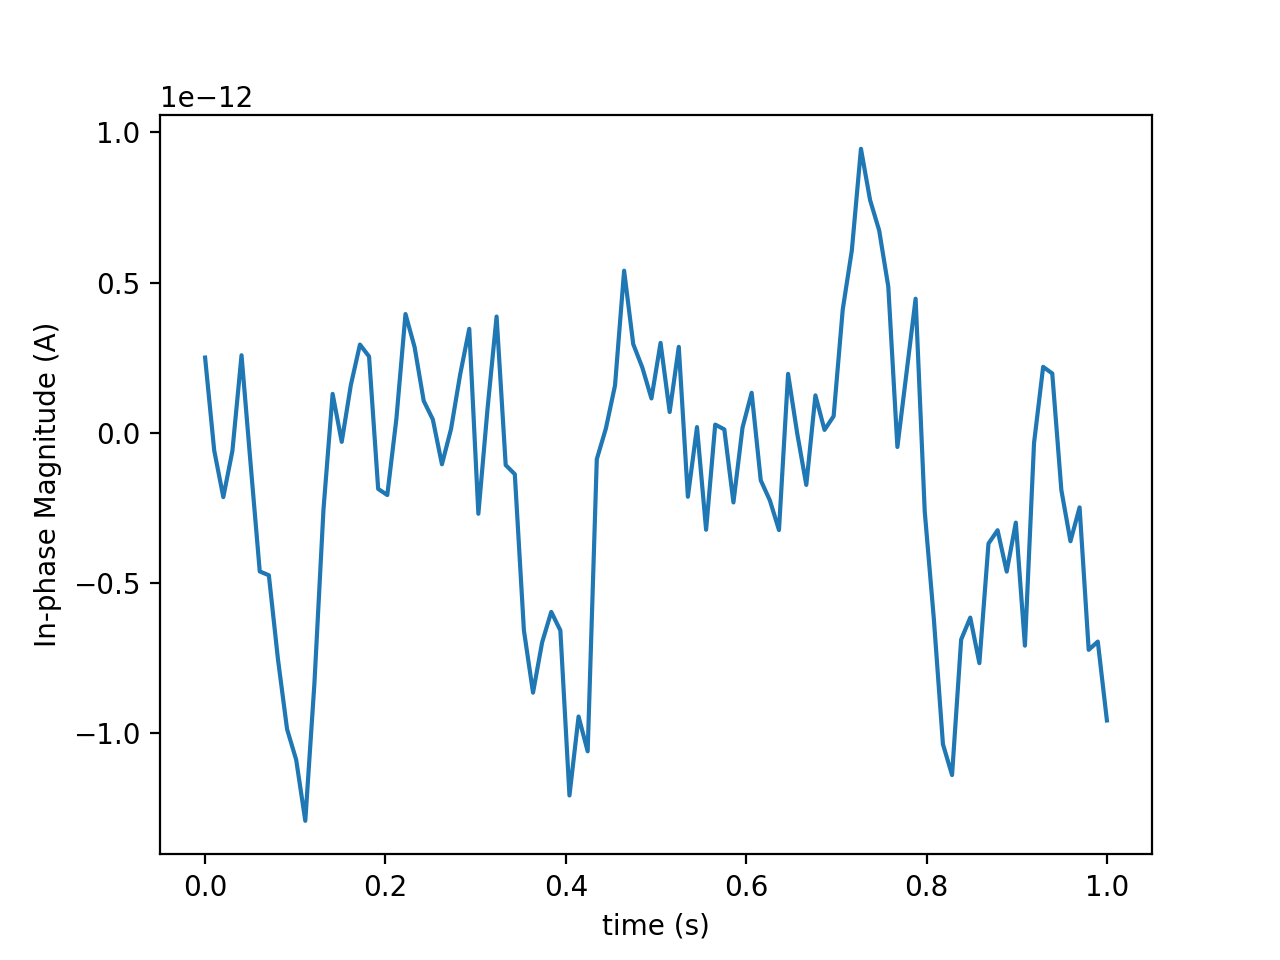

([<matplotlib.axes._subplots.AxesSubplot at 0x117ab40f0>], [None])

In [7]:
plot_by_id(4)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import load_by_id
from qcodes.dataset import experiment_container
%matplotlib tk

def make_title(dataset):
    '''Make a descriptive title for the dataset.'''
    experiment = experiment_container.load_experiment(dataset.exp_id)
    title = '{} on {} - {}.{} ({})'
    title = title.format(experiment.name, experiment.sample_name,
                         experiment.exp_id, dataset.counter, dataset.run_id)
    return title
        
def redraw(run_id, axes, cbars):
    '''Call plot_by_id to plot the available data on axes.'''
    pause_time = 0.001
    dataset = load_by_id(run_id)
    if not dataset: # there is not data available yet
        axes, cbars = [], []
    elif not axes: # there is data available but no plot yet
        axes, cbars = plot_by_id(run_id)
    else: # there is a plot already
        for axis in axes:
            axis.clear()
        for cbar in cbars:
            if cbar is not None:
                cbar.remove()
        axes, cbars = plot_by_id(run_id, axes)
        title = make_title(dataset)
        for axis in axes:
            axis.set_title(title)
        plt.pause(pause_time)
    return axes, cbars

#fig = plt.gcf()
#fig.show()
#fig.canvas.draw()

volt_all=[]
time_all=[]
axes, cbars = [], []
with meas.run() as datasaver:
    

    for k in range(200):
        set_I =yoko.current(500e-6)
        volt = dmm.volt()
        volt_all=np.append(volt_all,volt)
        
        now = dummy_time.seconds()
        time_all=np.append(time_all,now)
        
        datasaver.add_result((dmm.volt, volt),
                            (yoko.current, set_I),
                            (dummy_time.seconds, now))
        # compute something
        #plt.plot(time_all, volt_all) # plot something
        # update canvas immediately
        dataid = datasaver.run_id
        axes, cbars = redraw(dataid, axes, cbars)
        #plt.xlim([0, now])
        #plt.ylim([0, 50])
        plt.pause(0.5)  
        #fig.canvas.draw()

#dataid = datasaver.run_id  # convenient to have for plotting

Starting the measurement
Measuring with : <GS200: current_source> and <Keysight_34465A: dmm>
Starting experimental run with id: 95
End of measurement


In [32]:
#%matplotlib nbagg
#%matplotlib inline
#do1d(dummy_time.seconds,0,20,10,1,dmm.volt)

Starting experimental run with id: 78


78